In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [6]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
378,Prof,A,38,38,Male,150680


In [7]:
# indexes at axis=1
type(df.columns)

pandas.core.indexes.base.Index

In [8]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Null values

In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Dataframe Description:

The dataset contain the data of the employee. on the basis of the data we have to predict the salary of employee.The dataset contains the data like'rank','discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary

# Checking the datatype of the columns.

In [10]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [11]:
df['salary'].unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [12]:
df['salary'].nunique()

371

In [13]:
df.shape[0]

397

In [14]:
df.loc[df['salary']== " "]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


# Making DataFrame for the Nominal Data

In [15]:
df_visualization_nominal=df[['rank', 'discipline', 'sex']].copy()

In [16]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

# Visualization of the Data:

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

In [17]:
import seaborn as sns

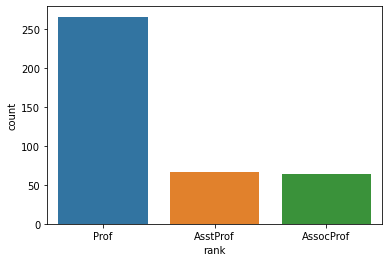

In [18]:
ax=sns.countplot(x='rank',data=df_visualization_nominal)

From the above observation the total number of prof is 282 , Asstprof rank is 60 and Assocprof is 55

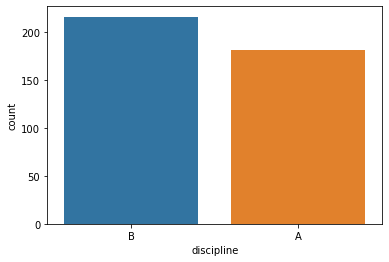

In [19]:
ax= sns.countplot(x='discipline',data=df_visualization_nominal)

From the above observation the total number of B is more then A

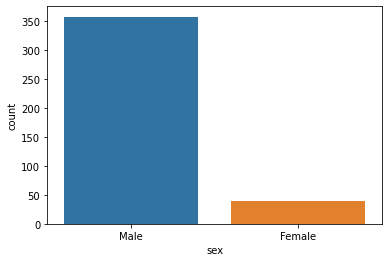

In [20]:
ax= sns.countplot(x='sex',data=df_visualization_nominal)

From the above observation the total number of Male is more then Female

Visualization part is completed.

# Encoding of DataFrame:

In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [22]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# Describe the dataset:

In [24]:
# only continuous columns
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

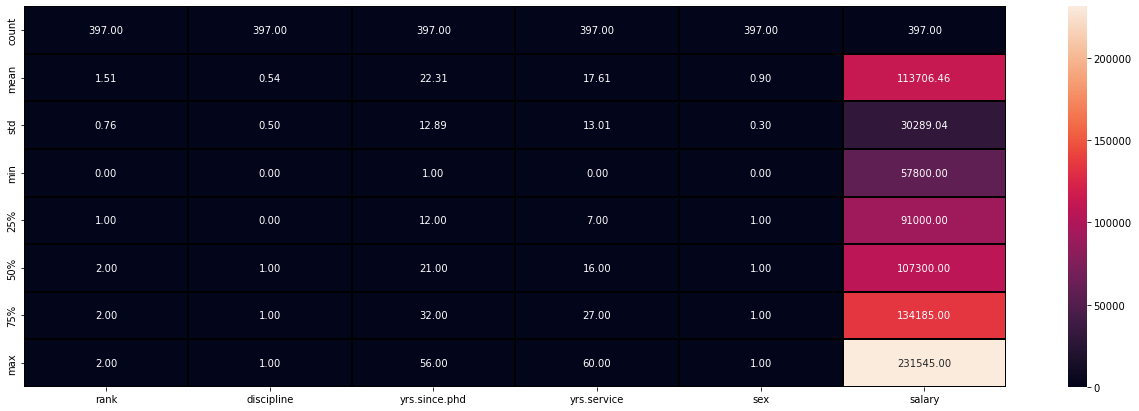

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

Correlation of the columns with the target columns:

In [26]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

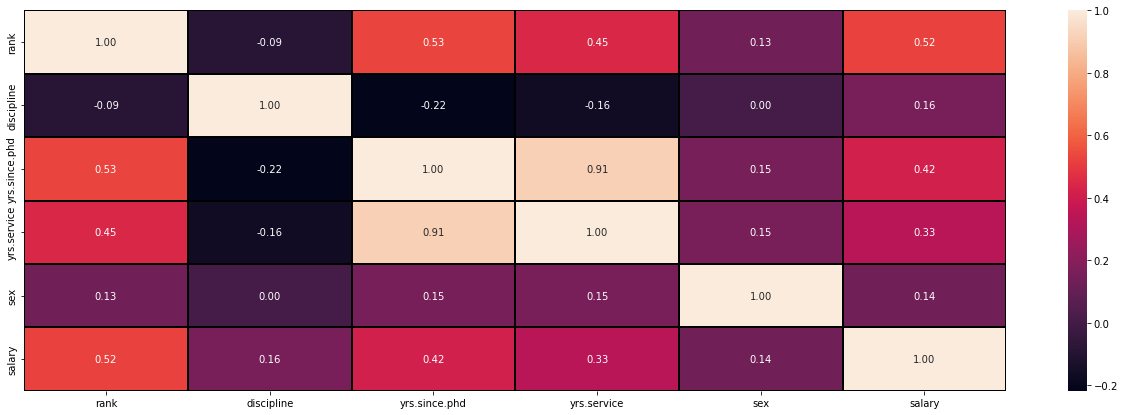

In [27]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

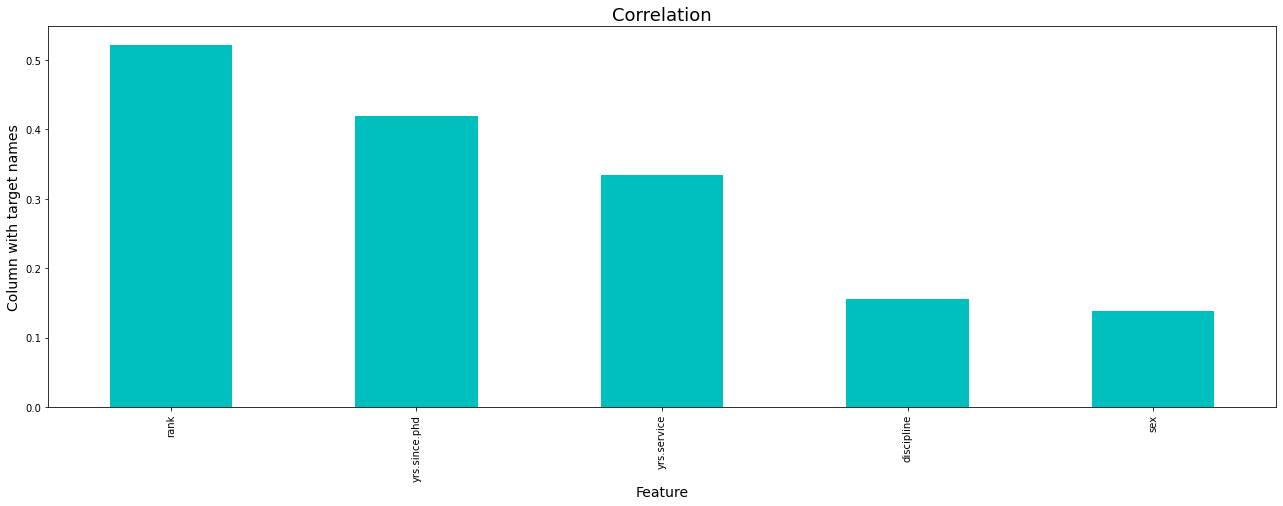

In [28]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From the above observation we can see that rank is highly correlated with target

In [29]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

keeping +/-0.5 as the range for skewness,here are the columns which does not lies within this range.

# outliers check:

In [30]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

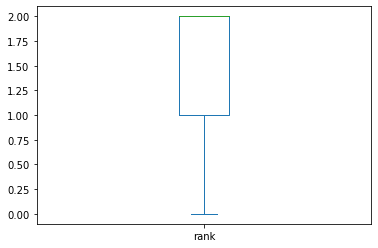

In [31]:
df['rank'].plot.box()

<AxesSubplot:>

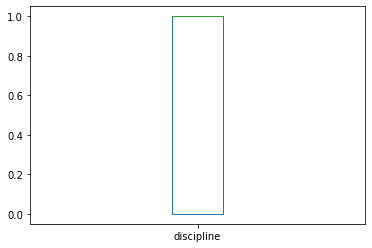

In [32]:
df['discipline'].plot.box()

<AxesSubplot:>

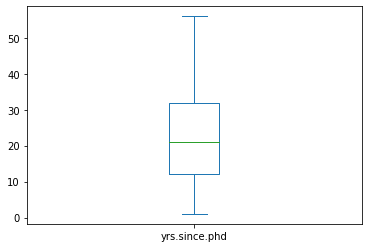

In [33]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

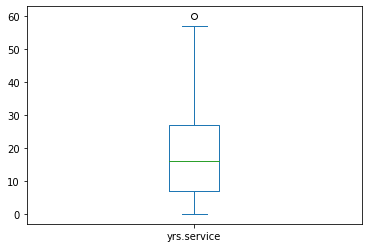

In [34]:
df['yrs.service'].plot.box()

<AxesSubplot:>

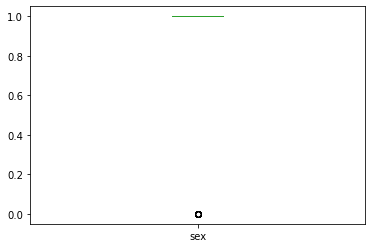

In [35]:
df['sex'].plot.box()

<AxesSubplot:>

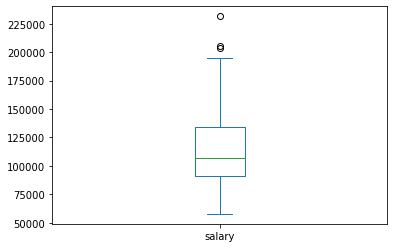

In [36]:
df['salary'].plot.box()

since the column sex is nominal type, we cannot consider its data point as outlier.

# outlier removal

In [37]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [38]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [39]:
df_new_z.shape

(354, 6)

In [40]:
## percentage loss of data:
Data_loss=((397-354)/397)*100
Data_loss

10.831234256926953

# Saparating the columns into features and target:

In [41]:
features=df.drop('salary',axis=1)
target=df['salary']

# Scaling the data using Min-Max Scaler:

In [42]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.36119999548530757
At random state 0,the testing accuracy is:- 0.40792583149752315


At random state 1,the training accuracy is:-0.3604245854198438
At random state 1,the testing accuracy is:- 0.4163364187662949


At random state 2,the training accuracy is:-0.37547390964955596
At random state 2,the testing accuracy is:- 0.36001895545266915


At random state 3,the training accuracy is:-0.3847313825130594
At random state 3,the testing accuracy is:- 0.329352987501086


At random state 4,the training accuracy is:-0.38517450334380454
At random state 4,the testing accuracy is:- 0.30440081333156155


At random state 5,the training accuracy is:-0.3950033630150771
At random state 5,the testing accuracy is:- 0.2752907752774736


At random state 6,the training accuracy is:-0.3650308031752798
At random state 6,the testing accuracy is:- 0.4018987080607571


At random state 7,the training accuracy is:-0.3575963886324032
At random state 7,the testing accura

In [45]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [46]:
# train the model
lr.fit(features_train,target_train)

LinearRegression()

In [47]:
pred_test=lr.predict(features_test)

In [48]:
print(r2_score(target_test,pred_test))

0.34397033297856505


# cross-validation of the model:

In [49]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.3270801167406513 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 3 the cv score is 0.32033286730598814 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 4 the cv score is 0.3218196693768357 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 5 the cv score is 0.29569928663871764 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 6 the cv score is 0.33096341839295573 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 7 the cv score is 0.3257704419996536 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 8 the cv score is

since the number of folds don't have such impact on the accuracy and cv_score.so cv =5 is selected.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

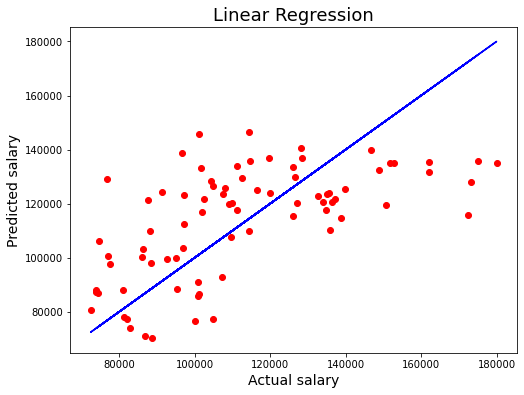

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual salary',fontsize=14)
plt.ylabel('Predicted salary',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization:

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [53]:
# final model training
ls=Lasso(alpha=10,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

37.67649888252015

In [54]:
pred_ls = ls.predict(features_test)

In [55]:
lss=r2_score(target_test,pred_ls)
lss*100

34.38690842511897

In [56]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

29.575407060855923

Ensemble technique:

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters= {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [58]:
rf=RandomForestRegressor(criterion='mae',max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('cross val score:',rfc*100)

R2 score: 34.189535989546584
cross val score: 26.167530641170206


In [59]:
import pickle
filename = 'salary.pkl'
pickle.dump(rf, open(filename, 'wb'))

conclusion:

In [60]:
loaded_model = pickle.load(open('salary.pkl','rb'))
result = loaded_model.score(features_test,target_test)
print(result*100)

34.189535989546584


In [61]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Orginal'])

In [62]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Predicted,145872.24,112815.315,156769.72,137029.72,85027.695,128702.88,95204.27,78452.55,145209.795,108563.835,...,69988.985,105364.97,121280.37,91617.58,86201.3,81098.26,111906.375,78435.09,134395.14,176003.5
Orginal,145872.24,112815.315,156769.72,137029.72,85027.695,128702.88,95204.27,78452.55,145209.795,108563.835,...,69988.985,105364.97,121280.37,91617.58,86201.3,81098.26,111906.375,78435.09,134395.14,176003.5
